In [1]:
import pathlib

In [2]:
data_root = 'animal-10/train'
data_root = pathlib.Path(data_root)
classes = []
for item in data_root.iterdir():
    print(str(item).split("\\")[-1])
    classes.append((str(item).split("\\")[-1]))
classes = tuple(classes)

# all_image_paths = list(data_root.glob('*/*'))
# all_image_paths = [str(path) for path in all_image_paths]
# #random.shuffle(all_image_paths)

# image_count = len(all_image_paths)
# label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
# label_to_index = dict((name, index) for index,name in enumerate(label_names))
# all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]

butterfly
cat
chicken
cow
dog
elephant
horse
sheep
spider
squirrel


In [3]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse

#from models import *
#from utils import progress_bar

In [4]:


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.Resize((128,128)),
#     transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

cuda:0
==> Preparing data..


In [5]:
trainset = torchvision.datasets.ImageFolder(root='./animal-10/train', transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5, shuffle=True, num_workers=2)
testset = torchvision.datasets.ImageFolder(root='./animal-10/val', transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False, num_workers=2)

In [6]:
trainset

Dataset ImageFolder
    Number of datapoints: 10000
    Root Location: ./animal-10/train
    Transforms (if any): Compose(
                             Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imgshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()


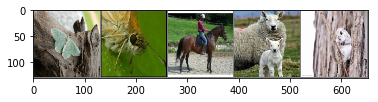

butterfly butterfly horse sheep


In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F


# from progressbar import *
# progress_bar = ProgressBar()

In [10]:
# kernal:3, stride:1
class Net(nn.Module):   
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,128,3)
        self.conv2 = nn.Conv2d(128,64,3)
        self.conv3 = nn.Conv2d(64,32,3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(32*14*14,512)
        self.fc2 = nn.Linear(512,128)
        self.fc3 = nn.Linear(128,32)
        self.fc4 = nn.Linear(32,10)
        self.logsoftmax = nn.LogSoftmax()
        
    def forward(self,x):
        #print(x.size(0))
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.logsoftmax(x)
        return x

In [11]:
# kernal:3, stride:2
# class Net(nn.Module):   
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3,128,3,stride=2)
#         self.conv2 = nn.Conv2d(128,64,3,stride=2)
#         self.conv3 = nn.Conv2d(64,32,3,stride=2)
#         self.pool = nn.MaxPool2d(2,2)
#         self.fc1 = nn.Linear(32*1*1,512)
#         self.fc2 = nn.Linear(512,128)
#         self.fc3 = nn.Linear(128,32)
#         self.fc4 = nn.Linear(32,10)
#         self.logsoftmax = nn.LogSoftmax()
        
#     def forward(self,x):
#         #print(x.size(0))
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(x.size(0),-1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = self.fc4(x)
#         x = self.logsoftmax(x)
#         return x

In [12]:
# kernal:5, stride:1
# class Net(nn.Module):   
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3,128,5)
#         self.conv2 = nn.Conv2d(128,64,5)
#         self.conv3 = nn.Conv2d(64,32,5)
#         self.pool = nn.MaxPool2d(2,2)
#         self.fc1 = nn.Linear(32*4*4,512)
#         self.fc2 = nn.Linear(512,128)
#         self.fc3 = nn.Linear(128,32)
#         self.fc4 = nn.Linear(32,10)
#         self.logsoftmax = nn.LogSoftmax()
        
#     def forward(self,x):
#         #print(x.size(0))
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(x.size(0),-1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = self.fc4(x)
#         x = self.logsoftmax(x)
#         return x

In [13]:
import torch.optim as optim
net = Net()
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
print_mini_batches = 200
loss_records = []
training_acc = []
testing_acc = []

for epoch in range(15):
    
    running_loss = 0.0
    loss_little_records = []
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
#         print(len(inputs))
        outputs = net(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         print(len(outputs),len(outputs[0])), print(labels)
#         print('---')
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if(i%print_mini_batches == (print_mini_batches-1)):
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/print_mini_batches))
            loss_little_records.append(running_loss/print_mini_batches)
            running_loss = 0.0
    loss_records.append(loss_little_records[-1])
    #testing Accurancy
    correct = 0
    total = 0
    with torch.no_grad():
        for i, data in enumerate(testloader, 0):
            images, labels = data
            images = images.to(device)
            outputs = net(images).cpu()
            _, predicted = torch.max(outputs.data, 1)
            predicted = predicted.cpu()
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
    testing_acc.append((100 * correct / total))
    print('Testing Acc : %d %%' % (100 * correct / total))
    
    #training Accurancy
    correct = 0
    total = 0
    with torch.no_grad():
         for i, data in enumerate(trainloader, 0):
            images, labels = data
            images= images.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            predicted = predicted.cpu()
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
    training_acc.append((100 * correct / total))
    print('Training Acc : %d %%' % (100 * correct / total))
    
print('Finish Training')

C:\Users\Rusy\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[1,   200] loss: 2.309
[1,   400] loss: 2.307
[1,   600] loss: 2.304
[1,   800] loss: 2.300
[1,  1000] loss: 2.305
[1,  1200] loss: 2.303
[1,  1400] loss: 2.303
[1,  1600] loss: 2.302
[1,  1800] loss: 2.300
[1,  2000] loss: 2.299
Testing Acc : 13 %
Training Acc : 12 %
[2,   200] loss: 2.294
[2,   400] loss: 2.287
[2,   600] loss: 2.263
[2,   800] loss: 2.259
[2,  1000] loss: 2.224
[2,  1200] loss: 2.195
[2,  1400] loss: 2.157
[2,  1600] loss: 2.144
[2,  1800] loss: 2.171
[2,  2000] loss: 2.127
Testing Acc : 23 %
Training Acc : 24 %
[3,   200] loss: 2.068
[3,   400] loss: 2.100
[3,   600] loss: 2.057
[3,   800] loss: 2.049
[3,  1000] loss: 2.054
[3,  1200] loss: 2.022
[3,  1400] loss: 1.980
[3,  1600] loss: 1.990
[3,  1800] loss: 2.003
[3,  2000] loss: 1.968
Testing Acc : 31 %
Training Acc : 32 %
[4,   200] loss: 1.927
[4,   400] loss: 1.930
[4,   600] loss: 1.854
[4,   800] loss: 1.861
[4,  1000] loss: 1.863
[4,  1200] loss: 1.810
[4,  1400] loss: 1.835
[4,  1600] loss: 1.802
[4,  1800

In [14]:


#training Accurancy
correct = 0
total = 0
with torch.no_grad():
     for i, data in enumerate(trainloader, 0):
        images, labels = data
        images= images.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.cpu()
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
print('Training Acc : %d %%' % (100 * correct / total))

C:\Users\Rusy\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Training Acc : 88 %


In [28]:
#testing Accurancy
classes_acc = [0]*10
classes_num = [0]*10
correct = 0
total = 0
correct_images = []
wrong_images = []
wrong_ans = []
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        images, labels = data
        images = images.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.cpu()
        total += labels.size(0)
        for single_data in range(len(predicted)):
            classes_num[labels[single_data]]+=1
            if(predicted[single_data]==labels[single_data]):
                correct += 1
                classes_acc[labels[single_data]]+=1
                correct_images.append(images[single_data])
            else:
                wrong_images.append(images[single_data])
                wrong_ans.append([predicted[single_data],labels[single_data]])
                
            
#         correct += (predicted==labels).sum().item()
print('Testing Acc : %d %%' % (100 * correct / total))
for single_class in range(len(classes_acc)):
    classes_acc[single_class] = classes_acc[single_class]/classes_num[single_class]

C:\Users\Rusy\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Testing Acc : 57 %


In [29]:
for single_class in range(len(classes)):
    print(classes[single_class],':',classes_acc[single_class])

butterfly : 0.6875
cat : 0.51
chicken : 0.6525
cow : 0.6425
dog : 0.3875
elephant : 0.65
horse : 0.4525
sheep : 0.47
spider : 0.7
squirrel : 0.57


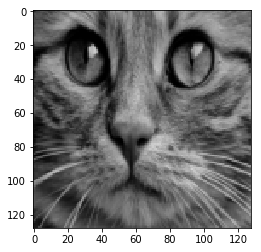

elephant chicken


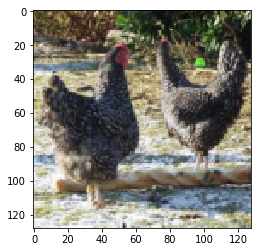

In [79]:
from random import randint
correct_image = correct_images[randint(0, len(correct_images))].cpu()
imgshow(torchvision.utils.make_grid(correct_image))

rnd_wrong_id = randint(0, len(wrong_images))
wrong_image = wrong_images[rnd_wrong_id].cpu()
print(classes[wrong_ans[rnd_wrong_id][0]], classes[wrong_ans[rnd_wrong_id][1]])
imgshow(torchvision.utils.make_grid(wrong_image))

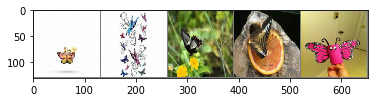

Groundtruth:  butterfly butterfly butterfly butterfly butterfly


In [18]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))
print('Groundtruth: ',' '.join('%5s' % classes[labels[j]] for j in range(5)))

In [19]:
images

tensor([[[[ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          ...,
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843]],

         [[ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          ...,
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843]],

         [[ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.9843,  0.9843,  

In [20]:
predicted[0]==labels[0]

tensor(0, dtype=torch.uint8)

In [21]:
testloader

In [22]:
trainloader

plot results

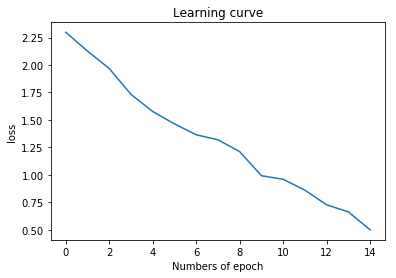

In [23]:
# loss
x = list(range(0,len(loss_records)))
plt.plot(x, loss_records)
plt.xlabel('Numbers of epoch')
plt.ylabel('loss')
plt.title('Learning curve')
plt.show()

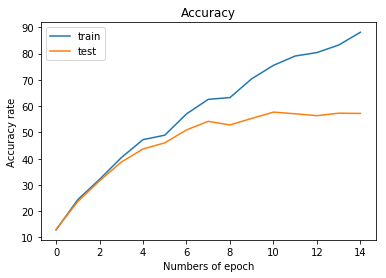

In [24]:
# training, testing
x = list(range(0,len(training_acc)))
plt.plot(x, training_acc, label='train')
plt.plot(x, testing_acc, label='test')
plt.xlabel('Numbers of epoch')
plt.ylabel('Accuracy rate')
plt.title('Accuracy')
plt.legend()
plt.show()